In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Análisis Exploratorio de Datos

### **`Carga de archivo excel e info básica`**

In [2]:
# Descargamos el archivi formato excel

df_train = pd.read_excel('..\Datathon\E-Commerce_train.xlsx')
df_test = pd.read_excel('..\Datathon\E-Commerce_test.xlsx')

In [131]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2000 non-null   int64 
 1   Warehouse_block      2000 non-null   object
 2   Mode_of_Shipment     2000 non-null   object
 3   Customer_care_calls  2000 non-null   int64 
 4   Customer_rating      2000 non-null   int64 
 5   Cost_of_the_Product  2000 non-null   int64 
 6   Prior_purchases      2000 non-null   int64 
 7   Product_importance   2000 non-null   object
 8   Gender               2000 non-null   object
 9   Discount_offered     2000 non-null   int64 
 10  Weight_in_gms        2000 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 172.0+ KB


In [132]:
df_train.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df_train= df_train.set_index('ID')
df_test= df_test.set_index('ID')
df_train.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [134]:
#Ver duplicados
df_train[df_train.duplicated()]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,


In [135]:
# Ver NaN
df_train.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [136]:
df_train.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [137]:
df_train.groupby(['Reached.on.Time_Y.N']).count()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
Reached.on.Time_Y.N,,,,,,,,,,
0,3280,3280,3280,3280,3280,3280,3280,3280,3280,3280
1,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719


Vamos a generar una columna adicional uniendo dos variables (en este caso zona + modo de envio) para tener una visualizacion mas representativa

In [142]:
df_train['WB_MOS'] = df_train['Warehouse_block'] + df_train['Mode_of_Shipment']
df_test['WB_MOS'] = df_test['Warehouse_block'] + df_test['Mode_of_Shipment']

### **`Visualizacion`**

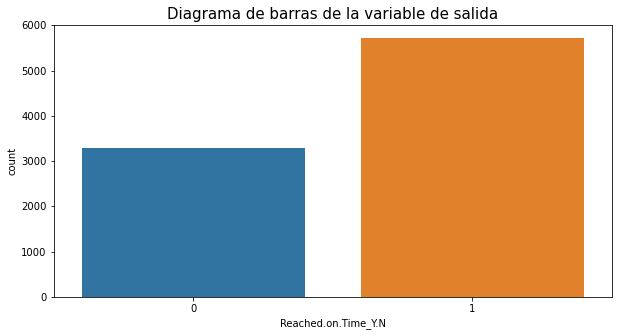

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Reached.on.Time_Y.N' ,label= 'Count', data = df_train)
plt.title('Diagrama de barras de la variable de salida', fontsize = 15)
plt.show()

Vemos que los datos estan notablemente balanceados 

**Se realizan algunas visualizaciones para ver el comportamiento de nuestros datos con respecto el target**

<AxesSubplot:xlabel='WB_MOS', ylabel='Count'>

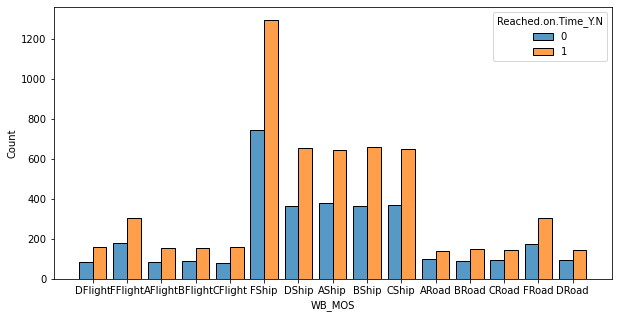

In [68]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_train, x= "WB_MOS", hue = "Reached.on.Time_Y.N", multiple="dodge",  shrink=.8)

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='Count'>

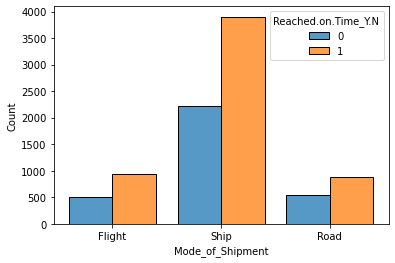

In [143]:
sns.histplot(data=df_train, x= "Mode_of_Shipment", hue = "Reached.on.Time_Y.N", multiple="dodge", shrink=.8)

No se encuentra una diferencia sustancial entre la cantidad de productos entregados a tiempo con los que tuvieron un retraso. 
Esto lo verificamos a traves de una tabla dinamica .

In [128]:
porcentaje = pd.pivot_table(df_train, 
index= 'WB_MOS',
columns= 'Reached.on.Time_Y.N',
values= ['Gender'],
aggfunc='count',
margins=True)['Gender'].loc[:,[0,1]].divide(pd.pivot_table(df_train, 
index= 'WB_MOS',
columns= 'Reached.on.Time_Y.N',
values= ['Gender'],
aggfunc='count',
margins=True)[('Gender', 'All')], axis = 0)
porcentaje

Reached.on.Time_Y.N,0,1
WB_MOS,,
AFlight,0.356846,0.643154
ARoad,0.410042,0.589958
AShip,0.369608,0.630392
BFlight,0.360996,0.639004
BRoad,0.365546,0.634454
BShip,0.354554,0.645446
CFlight,0.331950,0.668050
CRoad,0.403361,0.596639
CShip,0.363369,0.636631


<AxesSubplot:xlabel='Gender', ylabel='Count'>

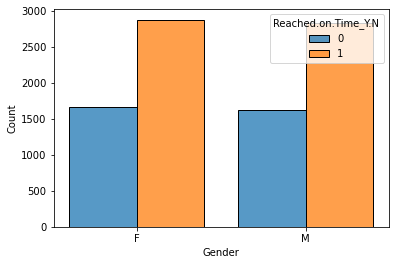

In [29]:
sns.histplot(data=df_train, x= "Gender", hue = "Reached.on.Time_Y.N", multiple="dodge", shrink=.8)

Lo mismo se verifica en cuanto a la dependencia del target con el genero, no se verifica ningun patron.

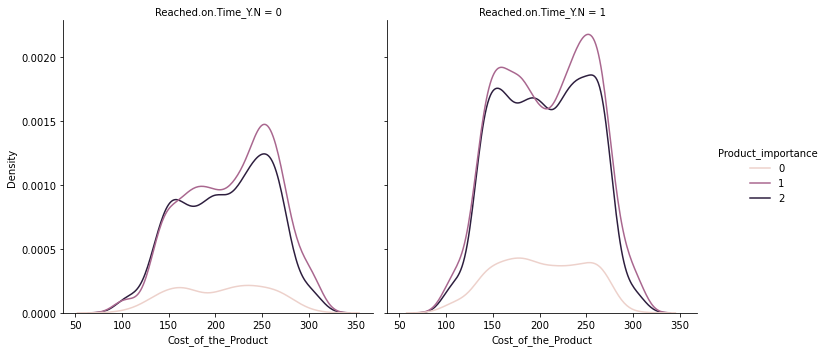

In [22]:
sns.displot(data=df_train, x="Cost_of_the_Product", hue = "Product_importance", col= "Reached.on.Time_Y.N", kind="kde")

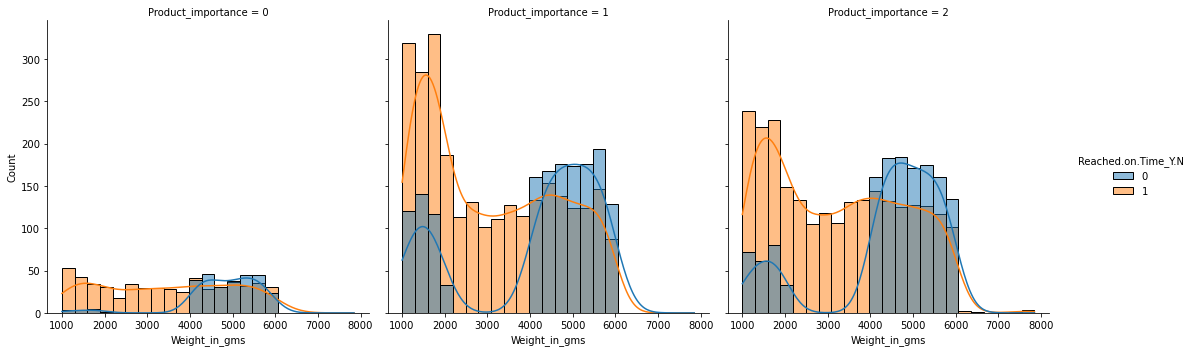

In [18]:
sns.displot(data=df_train, x="Weight_in_gms", hue = "Reached.on.Time_Y.N" , col = "Product_importance" , kde = True)

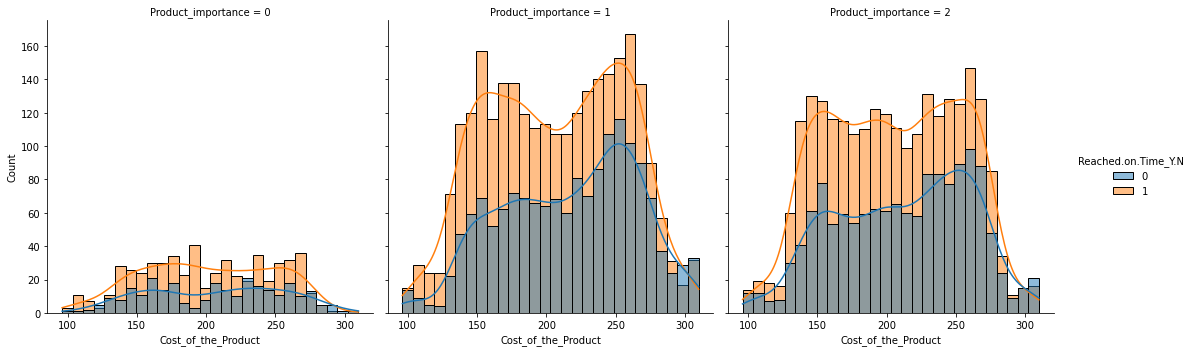

In [19]:
sns.displot(data=df_train, x="Cost_of_the_Product", hue = "Reached.on.Time_Y.N" , col = "Product_importance" , kde = True)

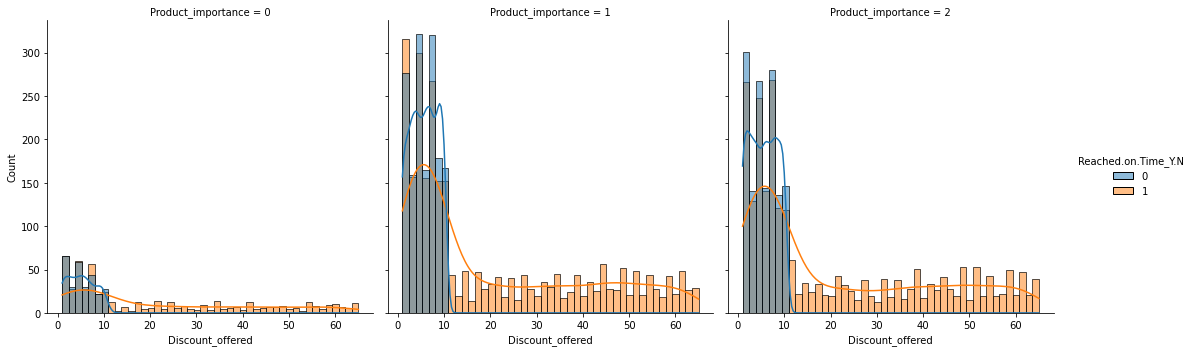

In [20]:
sns.displot(data=df_train, x="Discount_offered", hue = "Reached.on.Time_Y.N" , col = "Product_importance" , kde = True)

<AxesSubplot:xlabel='Product_importance', ylabel='Count'>

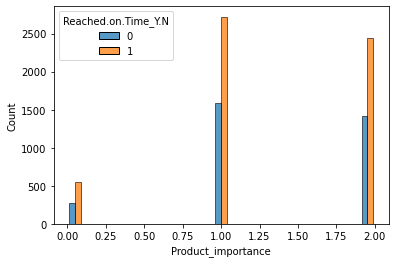

In [23]:
sns.histplot(data=df_train, x= "Product_importance" , hue = "Reached.on.Time_Y.N", multiple="dodge",  shrink=.8)


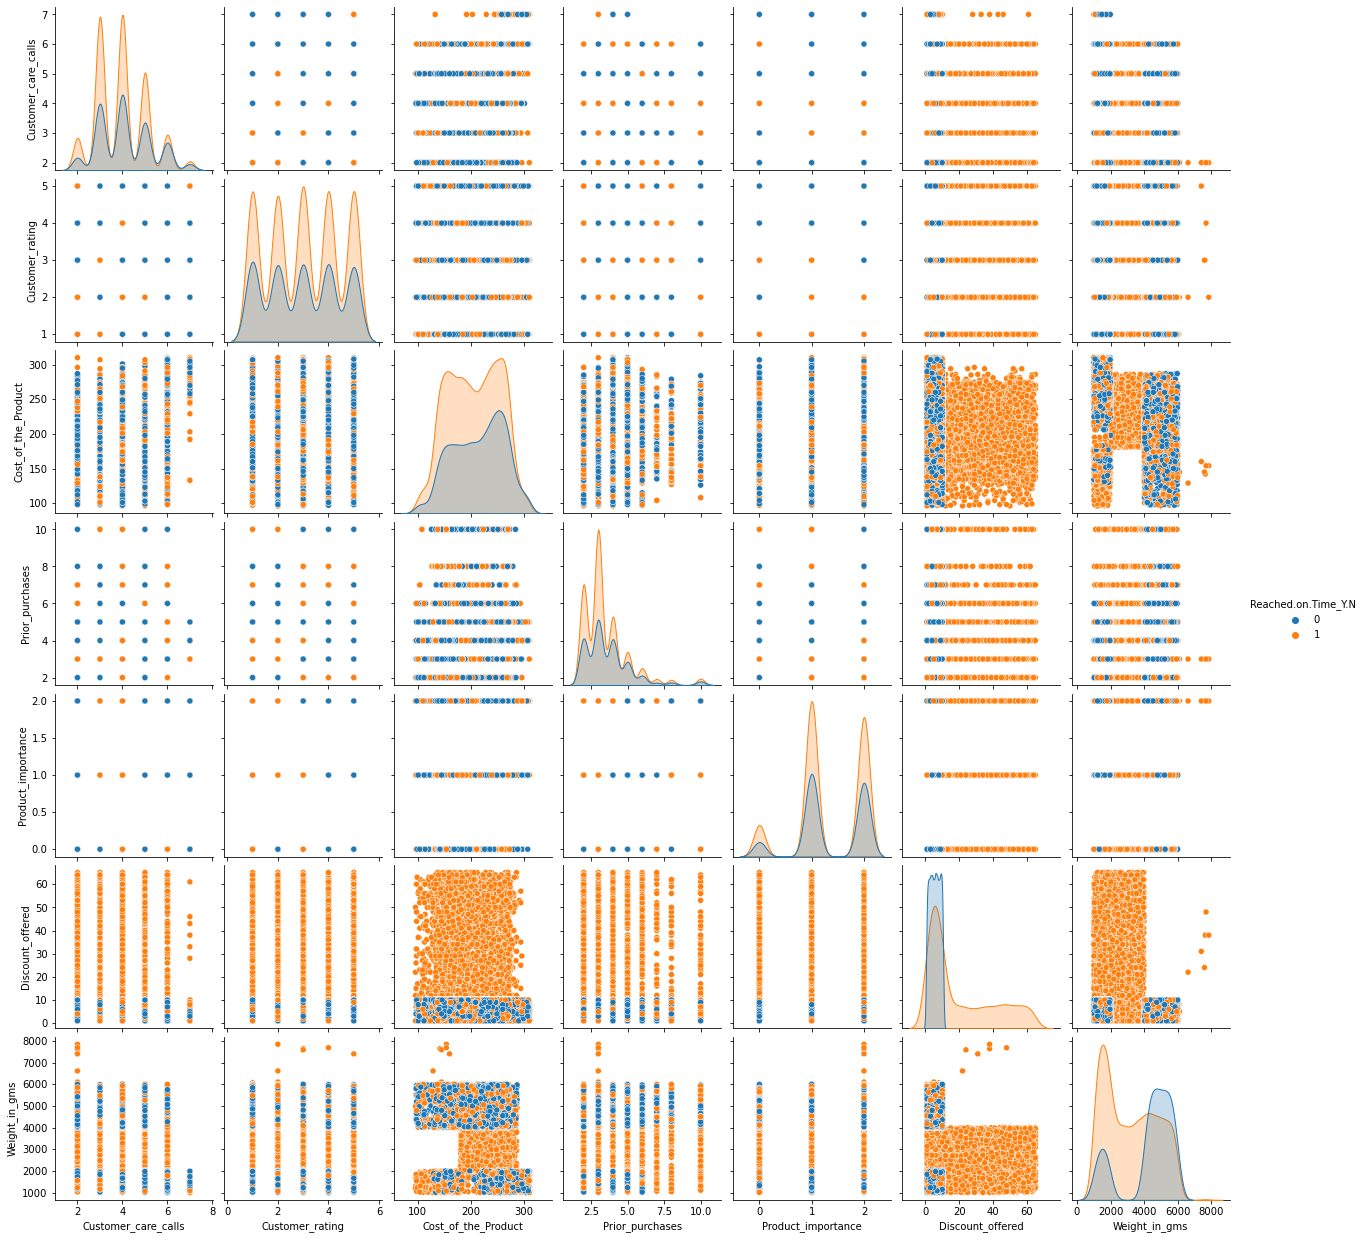

In [87]:
sns.pairplot(df_train, hue="Reached.on.Time_Y.N")

<AxesSubplot:>

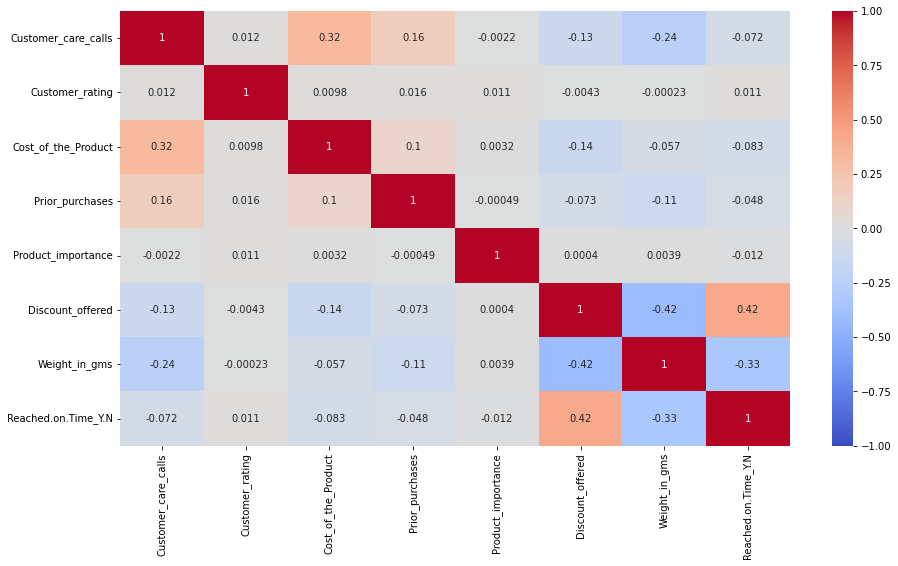

In [88]:
plt.figure(figsize = (15,8))
sns.heatmap(df_train.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')


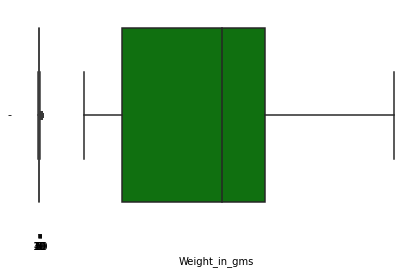

In [9]:
plt.figure(figsize = (7,4))
sns.boxplot(x= "Discount_offered",
             palette=["m", "g"],
            data=df_train)
sns.despine(offset=10, trim=True)

sns.boxplot(x= 'Weight_in_gms',
             palette=["g"],
            data=df_train)
sns.despine(offset=10, trim=True)

### **`Codificación de variables categóricas`**

**Se codifica las variables categoricas solo como parte del aprendizaje, puesto que no se usaran para el modelo; ya que no son variables relevantes**


Veamos la aplicación de Label Encoder para alguna variable ordinal de nuestro dataset, y One Hot Encoder (dummies en pandas) para codificar una variable nominal.


Variable ordinal = Product_importance

Varible nominal = Warehouse_block, Mode_of_Shipment

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [5]:
label_encoder = preprocessing.LabelEncoder()

df_train['Product_importance'] = label_encoder.fit_transform(df_train['Product_importance'])

df_test['Product_importance'] = label_encoder.fit_transform(df_test['Product_importance'])

Es vital eliminar una categoría en cada variable nominal para evitar problemas de colinearidad 

In [ ]:
dummy_1 =  pd.get_dummies(df_train['Warehouse_block'], prefix = 'WB') #, drop_first=True)
dummy_2 =  pd.get_dummies(df_train['Mode_of_Shipment'], prefix = 'MOS') #, drop_first= True)

dummy_1_test =  pd.get_dummies(df_test['Warehouse_block'], prefix = 'WB') #, drop_first=True)
dummy_2_test =  pd.get_dummies(df_test['Mode_of_Shipment'], prefix = 'MOS') #, drop_first= True)

In [ ]:
dummy_3 =  pd.get_dummies(df_train['WB_MOS'], prefix = 'WB_MOS',drop_first= True)
dummy_3_test = pd.get_dummies(df_test['WB_MOS'], prefix = 'WB_MOS',drop_first= True)

print(dummy_3.shape , dummy_3_test.shape)

# MODELAMIENTO DE LOS DATOS

Según se observa en nuestra matriz de correlacion solo dos variables tienen una buena correlacion con la variable target, sin embargo para nuestro modelo usaremos las 7 variables.

In [6]:
df_train_modelo = df_train[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                            'Prior_purchases','Product_importance','Discount_offered','Weight_in_gms']]

df_test_modelo = df_test[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                            'Prior_purchases','Product_importance','Discount_offered','Weight_in_gms']]
df_train_modelo.head(5)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
ID,,,,,,,
1,4,2,177,3,1,44,1233
2,4,5,216,2,1,59,3088
3,2,2,183,4,1,48,3374
4,3,3,176,4,2,10,1177
5,2,2,184,3,2,46,2484


In [7]:
y = df_train['Reached.on.Time_Y.N']
y.tail()

ID
8995    1
8996    0
8997    0
8998    1
8999    0
Name: Reached.on.Time_Y.N, dtype: int64

#### Convertimos en array nuestras variables para poder usarlos en los modelos

In [8]:
X_tr = np.asarray(df_train_modelo)
X_tst = np.asarray(df_test_modelo)
y = np.asarray(y)
print(y)
print(X_tr)
print(X_tst)

[1 1 1 ... 0 1 0]
[[   4    2  177 ...    1   44 1233]
 [   4    5  216 ...    1   59 3088]
 [   2    2  183 ...    1   48 3374]
 ...
 [   4    5  260 ...    2    6 4221]
 [   4    2  184 ...    2    5 5931]
 [   5    4  145 ...    1    4 4790]]
[[   5    1  189 ...    2   10 5248]
 [   5    3  150 ...    0    9 4446]
 [   3    3  200 ...    1    3 5739]
 ...
 [   5    4  242 ...    1    4 1155]
 [   5    2  223 ...    2    2 1210]
 [   2    5  155 ...    1    6 1639]]


### **`Escalado de variables`**

* La variable objetivo es si llego o no el paquete, la cual está entre cero y uno

* Sin embargo las variables explicativas numéricas tienen rangos muy variados. Esto puede "confundir" a los algoritmos de predicción

* Es necesario reescalar las variables para que estén en el mismo rango

In [9]:
#X_1 = preprocessing.StandardScaler().fit_transform(X)
X_train_esc = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(X_tr)
X_test_esc = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(X_tst)
X_train_esc[0:5]

array([[0.4       , 0.25      , 0.37850467, 0.125     , 0.5       ,
        0.671875  , 0.03389335],
       [0.4       , 1.        , 0.56074766, 0.        , 0.5       ,
        0.90625   , 0.30489408],
       [0.        , 0.25      , 0.40654206, 0.25      , 0.5       ,
        0.734375  , 0.34667641],
       [0.2       , 0.5       , 0.37383178, 0.25      , 1.        ,
        0.140625  , 0.0257122 ],
       [0.        , 0.25      , 0.41121495, 0.125     , 1.        ,
        0.703125  , 0.21665449]])

### **`PCA a nuestros datos`**

In [10]:
from sklearn.decomposition import PCA

pca=PCA(n_components=5)
pca.fit(X_train_esc) # buscar los componentes principales
X_pca=pca.transform(X_train_esc) 


#revisemos la forma del array
print("shape of X_pca", X_pca.shape)

shape of X_pca (8999, 5)


In [11]:
# Realizamos un PCA a nuestros datos de testeo

pca.fit(X_test_esc) # buscar los componentes principales
X_pca_test=pca.transform(X_test_esc) 


Veamos cuán buenos predictores son las nuevas dimensiones

In [12]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#con 4 componentes de 7  tenemos aprox el 85% de varianza explicada

[0.2774275  0.22249795 0.18363196 0.15453094 0.06304392]
suma: 0.901132264012646


Grafico de la variacion acumulada

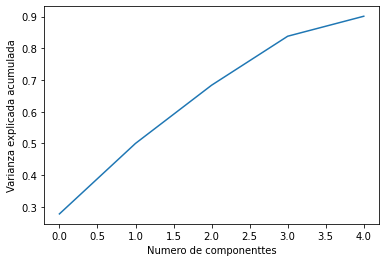

In [290]:
plt.plot(np.cumsum(expl))
plt.xlabel('Numero de componenttes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

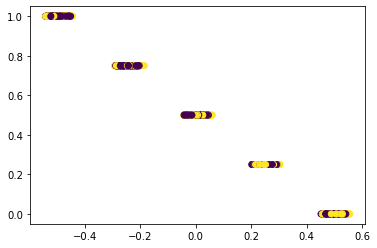

In [291]:
plt.scatter(X_pca[:,0], X_train_esc[:,1], c = y)
plt.show()

### **`Prediccion con Arbol de decisiones`**

#### **Usar datos de entrenamiento y test**

In [292]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.20, random_state = 42)
print ('Conjunto de Entrenamiento set:', X_train.shape,  y_train.shape)
print ('Conjunto de Prueba:', X_test.shape,  y_test.shape)


Conjunto de Entrenamiento set: (7199, 5) (7199,)
Conjunto de Prueba: (1800, 5) (1800,)


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [45]:

# IMPORTANTíSIMO: SI HAY UN DESBALANCE SE PUEDE SETEAR EL VALOR DE CLASS_wight
#tree = DecisionTreeClassifier(class_weight={0:1.5})
tree = DecisionTreeClassifier(max_depth = 35)

criterion = ['gini', 'entropy']
min_samples_split = range(2, 400, 20)

param_grid_tree = {'criterion': criterion, 
                   'min_samples_split': min_samples_split }


grid_model_tree = GridSearchCV(tree, param_grid=param_grid_tree, cv=5)

# Entrenamos el modelo

grid_model_tree.fit(X_pca, y) # me da un recall de 0.67 y una precision de 0.4745 al igual que KNN (LA MEJOR ES USANDO EL PARAMETRO PARA EVITAR EL DESBALANCE


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=35),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(2, 400, 20)})

#### **Verificar el modelo usando algunas metricas**

In [34]:
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score 


In [46]:
# Summarize results
best_score_tree, best_params_tree = grid_model_tree.best_score_, grid_model_tree.best_params_

# Creamos un diccionario guardando los mejores resultados
best_models_tree= {'Tree': best_score_tree}
print(f'Mejor resultado: {best_score_tree}, usando {best_params_tree}')

# Predecimos

y_pred_tree = grid_model_tree.predict(X_pca)

# Evaluamos

print('El recall del modelo es:', recall_score(y, y_pred_tree))

Mejor resultado: 0.6511638564634673, usando {'criterion': 'entropy', 'min_samples_split': 22}
El recall del modelo es: 0.8737541528239202


<Figure size 1080x576 with 0 Axes>

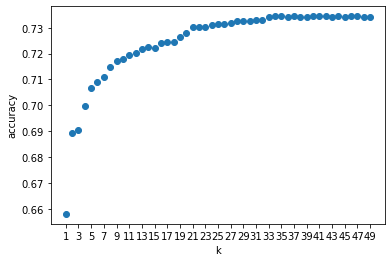

In [32]:
plt.figure(figsize = (15,8))
k_range = range(1, 50)
scores = []
for k in k_range:
    tree_2 = DecisionTreeClassifier(criterion = 'gini', max_depth = k , min_samples_split = 282)
    tree_2.fit(X_pca, y)
    scores.append(tree_2.score(X_pca, y))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(1, 50,2))
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      3280
           1       0.89      0.87      0.88      5719

    accuracy                           0.85      8999
   macro avg       0.84      0.85      0.84      8999
weighted avg       0.85      0.85      0.85      8999



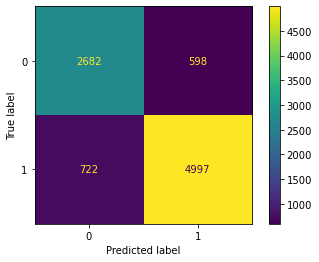

In [47]:
print (metrics.classification_report(y, y_pred_tree))

cm_tree = metrics.confusion_matrix(y, y_pred_tree)

cm_display_tree = metrics.ConfusionMatrixDisplay(cm_tree).plot()


#### **Curva ROC**
Es una representacion de la relacion entre las tasas de falsos positivos (FPR) y verdaderos positivos(TPR)

- Sensibilidad (Recall) = VerPos / total positivos
- Especificidad = VerNeg / total negativos

Aumenta sensibilidad, disminuye la especificidad

`Predict_proba` indica la probabilidad de que una instancia pertenezca a una de las categorías de la variable de salida.

In [48]:
y_score = grid_model_tree.predict_proba(X_pca)

print(y_score.shape)


print(y_score[0:5])

(8999, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_score[:, 1])

0.9414963866700216

In [50]:
# Computamos los valores de FPR (Tasa de falsos positivos) y TPR (tasa de verdaderos positivos), 
# para luego realizar el gráfico de la curva ROC.
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y[:], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

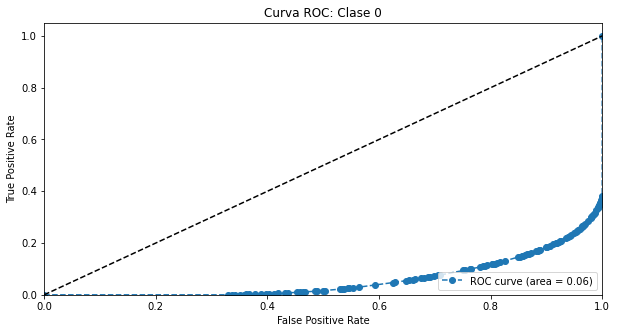

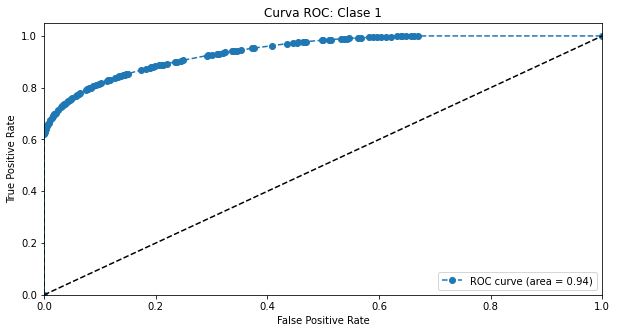

In [51]:
# Recorremos con un bucle cada una de las clases

for i in range(2):
    plt.figure(figsize=(10,5))
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.show()

In [52]:
# Predecimos los valores del target de nuestros datos de testeo
y_pred_test_tree = grid_model_tree.predict(X_pca_test)
df_tree = pd.DataFrame({"pred" : list(y_pred_test_tree)})
df_tree.value_counts()

pred
1       1620
0        380
dtype: int64

In [53]:
# Guardamos los valores
df_tree.to_csv('MarielCG.csv', index = False)

### **`Prediccion con Gaussian Naive Bayes`**

In [263]:
from sklearn.naive_bayes import GaussianNB

In [267]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit( X_pca, y)
y_pred_gaus = gnb.predict(X_pca)

In [268]:
# Print Test results
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          X_pca.shape[0],
          (y != y_pred_gaus).sum()
))

Total de Muestras en Test: 8999
Fallos: 2872


In [269]:
print(metrics.confusion_matrix(y, y_pred_gaus))
print(metrics.classification_report(y, y_pred_gaus))

[[2833  447]
 [2425 3294]]
              precision    recall  f1-score   support

           0       0.54      0.86      0.66      3280
           1       0.88      0.58      0.70      5719

    accuracy                           0.68      8999
   macro avg       0.71      0.72      0.68      8999
weighted avg       0.76      0.68      0.68      8999



In [273]:
y_pred_test_gaus = gnb.predict(X_pca_test)
df_gaus = pd.DataFrame({"pred" : list(y_pred_test_gaus)})
df_gaus.value_counts()

pred
1       1388
0        612
dtype: int64

### **`PREDICCION CON K-VECINOS`**

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# MEJOR PREDICCION HASTA EL MOMENTO
n_neighbors = 3

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_pca, y)

y_pred_knn = knn.predict(X_pca)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_pca, y)))
#print('Accuracy of K-NN classifier on test set: {:.2f}'
#     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.83


#### usando HIPERPARAMETOS

In [17]:
from sklearn.model_selection import GridSearchCV

n_neighbors = 3

knn = KNeighborsClassifier(n_neighbors)

weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p = [1, 2]

param_grid_knn = {'weights': weights, 
              'algorithm': algorithm,
              'p': p }

grid_model_knn = GridSearchCV(knn, param_grid=param_grid_knn, cv=5)


In [18]:
# Entrenamos el modelo
#grid_model_knn.fit(X_pca, y) # da una mejor 0.6706 de recall y 0.4745 de precision 0.4745

grid_model_knn.fit(X_pca, y) # sube recall 0.688 de recall pero baja presicion 0.458

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [20]:
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score

In [21]:
# Summarize results
best_score_knn, best_params_knn = grid_model_knn.best_score_, grid_model_knn.best_params_

# Creamos un diccionario guardando los mejores resultados
best_models_knn= {'Tree': best_score_knn}
print(f'Mejor resultado: {best_score_knn}, usando {best_params_knn}')

# Predecimos

y_pred_knn = grid_model_knn.predict(X_pca)

# Evaluamos

print('El recall del modelo es:', recall_score(y, y_pred_knn))

Mejor resultado: 0.6331621271076525, usando {'algorithm': 'auto', 'p': 2, 'weights': 'distance'}
El recall del modelo es: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3280
           1       1.00      1.00      1.00      5719

    accuracy                           1.00      8999
   macro avg       1.00      1.00      1.00      8999
weighted avg       1.00      1.00      1.00      8999



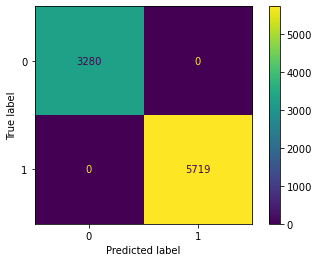

In [22]:
cm_knn = metrics.confusion_matrix(y, y_pred_knn)
print(metrics.classification_report(y, y_pred_knn))
cm_display_knn = metrics.ConfusionMatrixDisplay(cm_knn).plot()

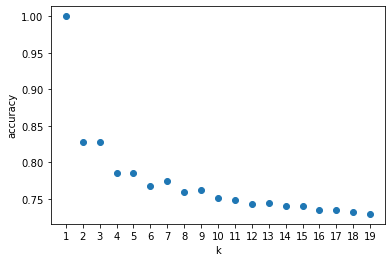

In [16]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_pca, y)
    scores.append(knn.score(X_pca, y))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(1, 20))
plt.show()

In [23]:
# Predecimos los valores del target de nuestros datos de testeo
y_pred_test_knn = grid_model_knn.predict(X_pca_test)
df_knn = pd.DataFrame({"pred" : list(y_pred_test_knn)})
df_knn.value_counts()

pred
1       1394
0        606
dtype: int64

In [24]:
# Guardamos los valores
df_knn.to_csv('MarielCG1.csv', index = False)